<a href="https://colab.research.google.com/github/daneshvar-amrollahi/UTKFace-Classification/blob/main/AI_CA5_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
!cp "/content/drive/MyDrive/CA5/UTKFace.tar.gz" .

In [182]:
!tar xvzf "UTKFace.tar.gz" > dataset_extract_log.txt

In [78]:
from tensorflow.keras import *
from tensorflow.keras.utils import *
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import tensorboard
import os

In [114]:
img_path = list()
Races = list()
file_names = list()

path = "/content/UTKFace"

for img in os.listdir(path):
  temp = img.split('.')

  if (len(temp[0].split('_')) == 4):
    img_path.append(os.path.join(path, img))
    Age, Gender, Race, Date = temp[0].split('_')
    file_names.append(temp[0] + '.' + temp[1])
    Races.append(int(Race))
  else:
    continue

classes_labels = {0:"White", 1:"Black", 2:"Asian", 3:"Indian", 4:"Others"}
Races = [str(to_categorical(i, len(classes_labels))) for i in Races]

df = pd.DataFrame({
    'image': img_path,
    'Race': Races
})


In [115]:
file_names[:5]

['45_1_0_20170117135025030.jpg',
 '40_1_0_20170104183430557.jpg',
 '30_0_1_20170116010659651.jpg',
 '22_0_0_20170117193856707.jpg',
 '35_0_0_20170117193222963.jpg']

In [116]:
Races[:5]

['[1. 0. 0. 0. 0.]',
 '[1. 0. 0. 0. 0.]',
 '[0. 1. 0. 0. 0.]',
 '[1. 0. 0. 0. 0.]',
 '[1. 0. 0. 0. 0.]']

In [117]:
print(Races[0])
test = (Races[0][1:-1].split(' '))
print(test)
print(test.index('1.'))

[1. 0. 0. 0. 0.]
['1.', '0.', '0.', '0.', '0.']
0


In [82]:
y = [0] * 5
for data in Races:
  race_one_hot = (data[1:-1].split(' '))
  race = race_one_hot.index('1.')
  y[race] += 1

x = [0, 1, 2, 3, 4]

print("Count of each race:")
print(y)

Count of each race:
[10078, 4526, 3434, 3975, 1692]


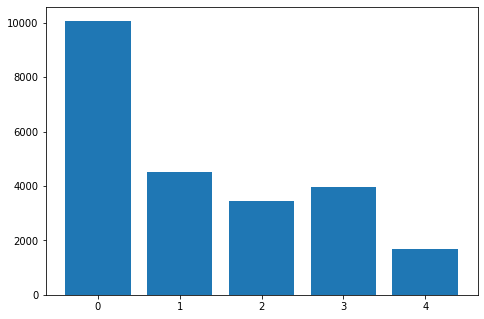

In [83]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x, y)
plt.show()

In [84]:

white = Races.index('[1. 0. 0. 0. 0.]')
black = Races.index('[0. 1. 0. 0. 0.]')
asian = Races.index('[0. 0. 1. 0. 0.]')
indian = Races.index('[0. 0. 0. 1. 0.]')
other = Races.index('[0. 0. 0. 0. 1.]')


In [ ]:
!ls

drive  sample_data  UTKFace  UTKFace.tar.gz


In [85]:
print('/content/UTKFace/' + file_names[white])

/content/UTKFace/45_1_0_20170117135025030.jpg


In [86]:
from IPython import display
display.Image('/content/UTKFace/' + file_names[white])

In [87]:
dataGenerator = preprocessing.image.ImageDataGenerator(
    rescale = 1/255.0, 
    validation_split = 0.3
)

In [118]:
TrainData = dataGenerator.flow_from_dataframe(
    dataframe = df, 
    x_col = 'image', 
    y_col = 'Race', 
    target_size = (100, 100), 
    color_mode = "grayscale",
    batch_size = 32, 
    class_mode = 'categorical', 
    subset = "training", 
    shuffle = False
)


Found 16594 validated image filenames belonging to 5 classes.


In [119]:
TestData = dataGenerator.flow_from_dataframe(
    dataframe = df, 
    x_col = 'image', 
    y_col = 'Race', 
    target_size = (100, 100), 
    color_mode = "grayscale",
    batch_size = 32, 
    class_mode = 'categorical', 
    subset = "validation", 
    shuffle = False
)



Found 7111 validated image filenames belonging to 5 classes.


In [120]:
input = layers.Input(shape = (100, 100, 1))

output = layers.Flatten()(input)
output = layers.Dense(1024, activation = "relu")(output)
output = layers.Dense(512, activation = "relu")(output)
output = layers.Dense(5, activation = "softmax")(output)

In [121]:
model = models.Model(inputs = input, outputs = output)

In [122]:
model.compile(optimizer = optimizers.SGD(learning_rate = 0.01), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [123]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100, 100, 1)]     0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              10241024  
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 2565      
Total params: 10,768,389
Trainable params: 10,768,389
Non-trainable params: 0
_________________________________________________________________


### Initial Model

In [124]:
history = model.fit(TrainData, validation_data = TestData, epochs = 10)

Epoch 1/10
519/519 [==============================] - 21s 40ms/step - loss: 1.2813 - accuracy: 0.5031 - val_loss: 1.1451 - val_accuracy: 0.5510
Epoch 2/10
519/519 [==============================] - 20s 39ms/step - loss: 1.1154 - accuracy: 0.5825 - val_loss: 1.1352 - val_accuracy: 0.5806
Epoch 3/10
519/519 [==============================] - 21s 40ms/step - loss: 1.0374 - accuracy: 0.6185 - val_loss: 1.0613 - val_accuracy: 0.6050
Epoch 4/10
519/519 [==============================] - 21s 41ms/step - loss: 0.9804 - accuracy: 0.6426 - val_loss: 0.9623 - val_accuracy: 0.6401
Epoch 5/10
519/519 [==============================] - 20s 39ms/step - loss: 0.9486 - accuracy: 0.6555 - val_loss: 0.9301 - val_accuracy: 0.6546
Epoch 6/10
519/519 [==============================] - 20s 39ms/step - loss: 0.9147 - accuracy: 0.6690 - val_loss: 0.9390 - val_accuracy: 0.6510
Epoch 7/10
519/519 [==============================] - 20s 39ms/step - loss: 0.8847 - accuracy: 0.6766 - val_loss: 0.8974 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


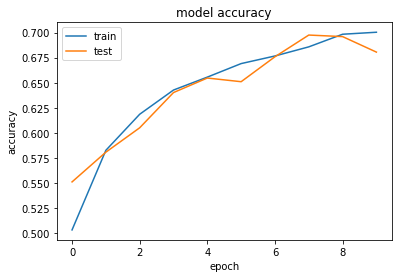

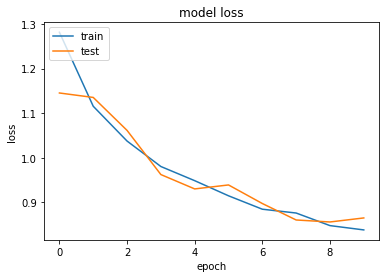

In [125]:

print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Source: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

519/519 [==============================] - 15s 29ms/step


### Train Data Results (Momentum = 0)

In [171]:
y_pred = model.predict(TrainData, verbose = 1)
y_pred_bool = np.argmax(y_pred, axis = 1)

y_true = np.array(TrainData.labels)

print(classification_report(y_true, y_pred_bool))

519/519 [==============================] - 15s 30ms/step
              precision    recall  f1-score   support

           0       0.50      0.00      0.01      1177
           1       0.76      0.42      0.54      2789
           2       0.84      0.55      0.66      2378
           3       0.81      0.78      0.79      3192
           4       0.64      0.94      0.76      7058

    accuracy                           0.70     16594
   macro avg       0.71      0.54      0.55     16594
weighted avg       0.71      0.70      0.66     16594



### Test Data Results (Momentum = 0)

In [172]:
y_pred = model.predict(TestData, verbose = 1)
y_pred_bool = np.argmax(y_pred, axis = 1)

y_true = np.array(TestData.labels)

print(classification_report(y_true, y_pred_bool))

223/223 [==============================] - 7s 29ms/step
              precision    recall  f1-score   support

           0       0.33      0.00      0.00       515
           1       0.72      0.40      0.51      1186
           2       0.81      0.53      0.64      1056
           3       0.78      0.76      0.77      1334
           4       0.63      0.92      0.75      3020

    accuracy                           0.68      7111
   macro avg       0.65      0.52      0.53      7111
weighted avg       0.68      0.68      0.64      7111



## Momentum

**Momentum** or **SGD with momentum** is a method which helps accelerate gradients vectors in the right directions, thus leading to faster converging in compare to stochastic gradient descent.
A momentum, is a moving average of our gradients. We then use it to update the weight of the network. Here is how the weights are updated using momentum:


$$velocity = momentum * velocity - learningRate * g$$
$$w = w + velocity$$

It considers the amount of weight increment in the previous iteration as well. Thus, if the optimization algorithm is moving in a general direction, the momentum causes it to ‘resist’ changes in direction.

A large value of momentum also means that the convergence will happen fast. But if both the momentum and learning rate are kept at large values, then you might skip the minimum with a huge step

In [174]:
model.compile(optimizer = optimizers.SGD(learning_rate = 0.01, momentum = 0.5), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [177]:
history = model.fit(TrainData, validation_data = TestData, epochs = 10)

Epoch 1/10
519/519 [==============================] - 21s 40ms/step - loss: 0.7157 - accuracy: 0.7459 - val_loss: 0.7922 - val_accuracy: 0.7203
Epoch 2/10
519/519 [==============================] - 21s 40ms/step - loss: 0.6992 - accuracy: 0.7511 - val_loss: 0.8430 - val_accuracy: 0.7017
Epoch 3/10
519/519 [==============================] - 21s 40ms/step - loss: 0.6875 - accuracy: 0.7549 - val_loss: 0.8506 - val_accuracy: 0.7019
Epoch 4/10
519/519 [==============================] - 21s 40ms/step - loss: 0.6766 - accuracy: 0.7598 - val_loss: 0.7579 - val_accuracy: 0.7324
Epoch 5/10
519/519 [==============================] - 20s 39ms/step - loss: 0.6695 - accuracy: 0.7600 - val_loss: 0.7736 - val_accuracy: 0.7261
Epoch 6/10
519/519 [==============================] - 20s 39ms/step - loss: 0.6613 - accuracy: 0.7662 - val_loss: 0.8083 - val_accuracy: 0.7182
Epoch 7/10
519/519 [==============================] - 21s 40ms/step - loss: 0.6446 - accuracy: 0.7670 - val_loss: 0.8013 - val_accuracy:

### Test Results with Momentum = 0.5

In [178]:
y_pred = model.predict(TrainData, verbose = 1)
y_pred_bool = np.argmax(y_pred, axis = 1)

y_true = np.array(TrainData.labels)

print(classification_report(y_true, y_pred_bool))

519/519 [==============================] - 14s 27ms/step
              precision    recall  f1-score   support

           0       0.61      0.22      0.32      1177
           1       0.77      0.71      0.74      2789
           2       0.94      0.69      0.80      2378
           3       0.80      0.91      0.85      3192
           4       0.79      0.92      0.85      7058

    accuracy                           0.80     16594
   macro avg       0.78      0.69      0.71     16594
weighted avg       0.80      0.80      0.78     16594



#### As it can be seen, there is a 10% increase in accuracy when momentum is set to 0.5 in compare to the previous case which momentum was 0.

In [179]:
model.compile(optimizer = optimizers.SGD(learning_rate = 0.01, momentum = 0.9), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [180]:
history = model.fit(TrainData, validation_data = TestData, epochs = 10)

Epoch 1/10
519/519 [==============================] - 21s 40ms/step - loss: 1.0378 - accuracy: 0.6240 - val_loss: 1.2645 - val_accuracy: 0.4516
Epoch 2/10
519/519 [==============================] - 21s 41ms/step - loss: 1.0306 - accuracy: 0.6268 - val_loss: 1.0302 - val_accuracy: 0.6497
Epoch 3/10
519/519 [==============================] - 21s 41ms/step - loss: 0.9920 - accuracy: 0.6440 - val_loss: 0.9759 - val_accuracy: 0.6293
Epoch 4/10
519/519 [==============================] - 22s 42ms/step - loss: 0.9440 - accuracy: 0.6571 - val_loss: 0.9650 - val_accuracy: 0.6393
Epoch 5/10
519/519 [==============================] - 22s 42ms/step - loss: 0.9229 - accuracy: 0.6672 - val_loss: 0.9765 - val_accuracy: 0.6351
Epoch 6/10
519/519 [==============================] - 22s 42ms/step - loss: 0.8934 - accuracy: 0.6812 - val_loss: 0.8681 - val_accuracy: 0.7033
Epoch 7/10
519/519 [==============================] - 22s 42ms/step - loss: 0.8775 - accuracy: 0.6881 - val_loss: 0.8526 - val_accuracy:

In [181]:
y_pred = model.predict(TrainData, verbose = 1)
y_pred_bool = np.argmax(y_pred, axis = 1)

y_true = np.array(TrainData.labels)

print(classification_report(y_true, y_pred_bool))

519/519 [==============================] - 15s 29ms/step
              precision    recall  f1-score   support

           0       0.62      0.02      0.03      1177
           1       0.57      0.75      0.65      2789
           2       0.64      0.84      0.72      2378
           3       0.83      0.80      0.82      3192
           4       0.80      0.76      0.78      7058

    accuracy                           0.73     16594
   macro avg       0.69      0.63      0.60     16594
weighted avg       0.73      0.73      0.71     16594



### Results Compared:

X                  | Momentum = 0 | Momentum = 0.5 | Momentum = 0.9 |
-------------------|--------------|----------------|----------------|
Accuracy           | 68%          |         80%    |          73%   |

A too large momentum value might cause the algorithm to jump over the minimum value with a huge step.